In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [67]:
def get_mta_data(weeks):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    df_list = []
    for week in weeks:
        df_list.append(pd.read_csv(url.format(week)))
    return pd.concat(df_list)

In [68]:
mta_df = get_mta_data([150502, 150509, 150516, 150523])

In [69]:
#dups = mta_df[(mta_df['STATION'] == '34 ST-PENN STA')&(mta_df['LINENAME'] == '123ACE')]
#mta_df.drop(dups.index,inplace=True)
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,00:00:00,REGULAR,5106770,1729635
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,04:00:00,REGULAR,5106810,1729649
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,08:00:00,REGULAR,5106835,1729680
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,12:00:00,REGULAR,5106961,1729784
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,16:00:00,REGULAR,5107250,1729858
5,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/25/2015,20:00:00,REGULAR,5107620,1729914
6,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/26/2015,00:00:00,REGULAR,5107793,1729955
7,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/26/2015,04:00:00,REGULAR,5107815,1729964
8,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/26/2015,08:00:00,REGULAR,5107844,1729991
9,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,04/26/2015,12:00:00,REGULAR,5107912,1730068


In [70]:
def get_entries(mta_df):
    d = {}
    turnstile_d = {}
    for row in mta_df.itertuples():
        C_A, unit, scp, station, linename = row[1], row[2], row[3], row[4], row[5]
        date = row[7]
        entries = row[10]
        k = (C_A, unit, scp, station, linename, date)
        if k not in d:
            d[k] = [entries]
        else:
            d[k].append(entries)
    for key, value in d.items():
        entry = abs(max(value) - min(value))
        turnstile_d[key] = [entry]
    return turnstile_d

In [71]:
d = get_entries(mta_df)

In [72]:
dict_df = pd.DataFrame.from_dict(d, orient='index')
dict_df.rename(columns = {0:'Entries'}, inplace=True)
dict_df.head(10)

,Entries
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 04/25/2015)",850
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 04/26/2015)",574
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 04/27/2015)",1523
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 04/28/2015)",1464
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 04/29/2015)",1523
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 04/30/2015)",1464
"(A002, R051, 02-00-00, LEXINGTON AVE, NQR456, 05/01/2015)",1422
"(A002, R051, 02-00-01, LEXINGTON AVE, NQR456, 04/25/2015)",659
"(A002, R051, 02-00-01, LEXINGTON AVE, NQR456, 04/26/2015)",494
"(A002, R051, 02-00-01, LEXINGTON AVE, NQR456, 04/27/2015)",1284


In [73]:
turnstile_df = pd.DataFrame(columns=[])
turnstile_df['C/A'] = [row[0][0] for row in dict_df.itertuples()]
turnstile_df['Unit'] = [row[0][1] for row in dict_df.itertuples()]
turnstile_df['SCP'] = [row[0][2] for row in dict_df.itertuples()]
turnstile_df['Station'] = [row[0][3] for row in dict_df.itertuples()]
turnstile_df['Linename'] = [row[0][4] for row in dict_df.itertuples()]
turnstile_df['Date'] = [row[0][5] for row in dict_df.itertuples()]
turnstile_df['Entries'] = [row[1] for row in dict_df.itertuples()]

In [74]:
turnstile_df.head(10)

,C/A,Unit,SCP,Station,Linename,Date,Entries
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,04/25/2015,850
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,04/26/2015,574
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,04/27/2015,1523
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,04/28/2015,1464
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,04/29/2015,1523
5,A002,R051,02-00-00,LEXINGTON AVE,NQR456,04/30/2015,1464
6,A002,R051,02-00-00,LEXINGTON AVE,NQR456,05/01/2015,1422
7,A002,R051,02-00-01,LEXINGTON AVE,NQR456,04/25/2015,659
8,A002,R051,02-00-01,LEXINGTON AVE,NQR456,04/26/2015,494
9,A002,R051,02-00-01,LEXINGTON AVE,NQR456,04/27/2015,1284


In [75]:
def delete_outliers(df, iters=5):
    '''
    finds the max values in a dataframe grouped by columns
    input a data frame
    iters = number of outliers to delete
    '''
    for i in range(iters):
        to_delete_rows = df.loc[df.groupby(["Station","Linename"])['Entries'].idxmax()]
        to_delete_indices = list(to_delete_rows.index.values)
        df.drop(to_delete_indices, inplace=True)
    return df

In [76]:
no_outliers_turnstile_df = delete_outliers(turnstile_df, iters=5)
no_outliers_turnstile_df['Entries'].max()

7510

In [77]:
pd.to_datetime(no_outliers_turnstile_df['Date'])
no_outliers_turnstile_df.groupby(['Linename', 'Station']).sum().sort_values(by='Entries',ascending=False).head(10)

busiest_turnstile_df = no_outliers_turnstile_df.groupby(['Linename','Station']).sum()
busiest_turnstile_df = busiest_turnstile_df.sort_values(by='Entries',ascending=False)[:10]
busiest_turnstile_df.reset_index(inplace=True)
busiest_turnstile_df

,Linename,Station,Entries
0,4567S,42 ST-GRD CNTRL,3293841
1,BDFMNQR,34 ST-HERALD SQ,2649915
2,ACENQRS1237,42 ST-PA BUS TE,1979819
3,ACE,34 ST-PENN STA,1814176
4,1237ACENQRS,42 ST-TIMES SQ,1789246
5,LNQR456,14 ST-UNION SQ,1593414
6,456,86 ST,1478304
7,7,MAIN ST,1410395
8,ABCD1,59 ST-COLUMBUS,1270763
9,123ACE,34 ST-PENN STA,1261344


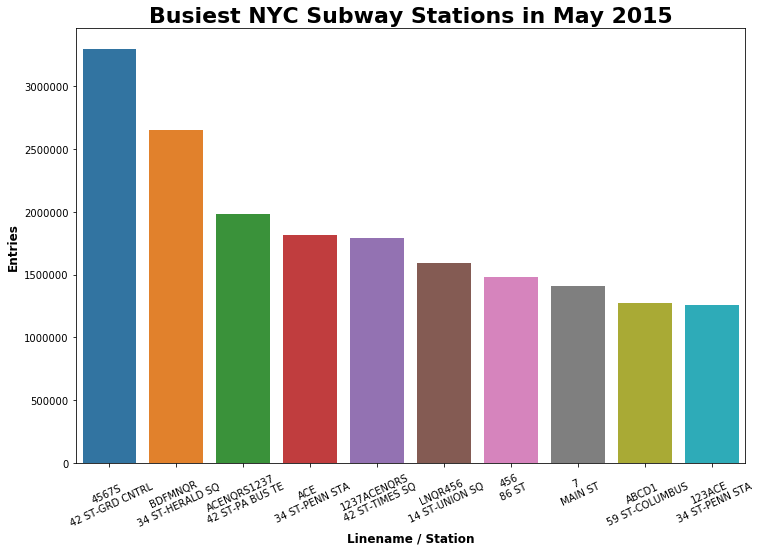

In [78]:
plt.figure(figsize=(12,8))
sb.barplot(busiest_turnstile_df['Linename'] + '\n' + busiest_turnstile_df['Station'], busiest_turnstile_df['Entries'])
plt.title('Busiest NYC Subway Stations in May 2015',fontsize=22, weight='bold')
plt.xlabel('Linename / Station', fontsize=12, weight='bold')
plt.ylabel('Entries', fontsize=12, weight='bold')
plt.xticks(rotation=25, fontsize=10);

In [79]:
busy_stations = busiest_turnstile_df['Station']
timeseries_df = turnstile_df[turnstile_df['Station'].isin(busy_stations)]
timeseries_df = timeseries_df.groupby(['Linename', 'Station', 'Date'], as_index=False).sum()
timeseries_df['Date'] = pd.to_datetime(timeseries_df['Date'])
timeseries_df.head(10)

,Linename,Station,Date,Entries
0,1,86 ST,2015-04-25,11427
1,1,86 ST,2015-04-26,10043
2,1,86 ST,2015-04-27,18622
3,1,86 ST,2015-04-28,19231
4,1,86 ST,2015-04-29,16436
5,1,86 ST,2015-04-30,19811
6,1,86 ST,2015-05-01,20430
7,1,86 ST,2015-05-02,12463
8,1,86 ST,2015-05-03,11159
9,1,86 ST,2015-05-04,18934


In [80]:
timeseries_df.groupby(['Station', 'Linename']).sum().sort_values(by = 'Entries', ascending=False)

,,Entries
Station,Linename,
42 ST-GRD CNTRL,4567S,3293841
34 ST-HERALD SQ,BDFMNQR,2649915
42 ST-PA BUS TE,ACENQRS1237,1979819
34 ST-PENN STA,ACE,1814176
42 ST-TIMES SQ,1237ACENQRS,1789246
14 ST-UNION SQ,LNQR456,1593414
86 ST,456,1478304
MAIN ST,7,1410395
59 ST-COLUMBUS,ABCD1,1270763


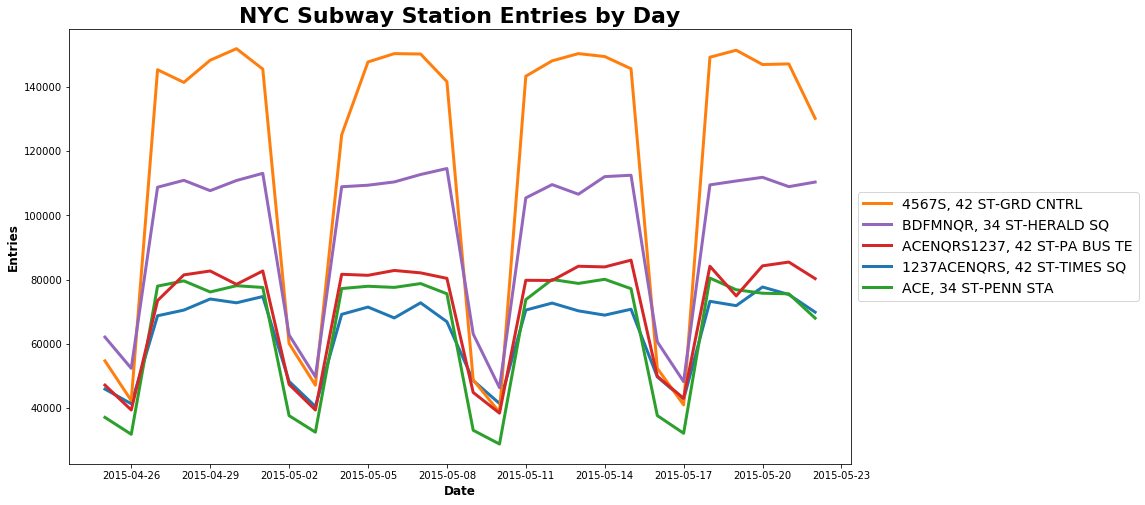

In [82]:
fig = plt.figure(1, figsize = (14, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Date', fontsize=12, weight='bold')
ax1.set_ylabel('Entries', fontsize=12, weight='bold')
ax1.set_title('NYC Subway Station Entries by Day', fontsize=22, weight='bold')
busiest_five_stations = busiest_turnstile_df[:5]
for key, grp in busiest_five_stations.groupby(['Linename', 'Station']):
    station = timeseries_df[(timeseries_df['Linename'] == key[0]) & \
                             (timeseries_df['Station'] == key[1])]

    station = station.groupby('Date').sum().reset_index() 
    ax1.plot('Date', 'Entries', data = station, label = key[0] + ', ' + key[1], linewidth=3)

handles,labels = ax1.get_legend_handles_labels()
#print(handles,labels)
handles = [handles[1], handles[4], handles[3], handles[0], handles[2]]
labels = [labels[1], labels[4], labels[3], labels[0], labels[2]]

ax1.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14);